In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [2]:
path = '/kaggle/input/home-credit-default-risk/'
bureau_df = pd.read_csv(path + 'bureau.csv')
bureau_balance_df = pd.read_csv(path + 'bureau_balance.csv')

## BUREAU

### Understanding of variable

In [3]:
bureau_df.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


- This table talks about the Loan data of each unique customer with all financial institutions other than Home Credit For each unique SK_ID_CURR we have multiple SK_ID_BUREAU Id's, each being a unique loan transaction from other financial institutions availed by the same customer and reported to the bureau.
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

CREDIT_ACTIVE - Current status of a Loan 

CREDIT_CURRENCY - Currency in which the transaction was executed - Currency1, Currency2, Currency3, Currency4 ( 4 values)

DAYS_CREDIT - Number of days ELAPSED since customer applied for CB credit with respect to current application Interpretation - Are these loans evenly spaced time intervals? Are they concentrated within a same time frame?

CREDIT_DAY_OVERDUE - Number of overdue days

CREDIT_TYPE - Consumer Credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replemishment, Loan for Business development, Real estate loan, Unkown type of laon, Another type of loan. Cash loan, Loan for the purchase of equipment, Mobile operator loan, Interbank credit, Loan for purchase of shares ( 15 values )

DAYS_CREDIT_ENDDATE - Number of days the customer CREDIT is valid at the time of application 

DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application 

AMT_CREDIT_MAX_OVERDUE - Maximum Credit amount overdue at the time of application

CNT_CREDIT_PROLONG - How many times was the Credit date prolonged

AMT_CREDIT_SUM - Total available credit for a customer 

AMT_CREDIT_SUM_DEBT - Total amount yet to be repayed 

AMT_CREDIT_SUM_LIMIT - Current Credit that has been utilized 
- For a given loan transaction 'AMT_CREDIT_SUM' = 'AMT_CREDIT_SUM_DEBT' +'AMT_CREDIT_SUM_LIMIT

AMT_CREDIT_SUM_OVERDUE - Current credit payment that is overdue 

DAYS_CREDIT_UPDATE - Number of days before current application when last CREDIT UPDATE was received 

AMT_ANNUITY - Annuity of the Credit Bureau data 


In [4]:
bureau_df.nunique()

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

In [5]:
bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


### Checking missing value

In [6]:
def check_missing(df):
    total_miss = df.isnull().sum()
    miss_val_per = (total_miss/len(df)) * 100
    miss_table = pd.concat([total_miss, miss_val_per], axis=1)
    miss_table = miss_table[miss_table[0] != 0].rename(columns = {0:'Number missing Value', 1:'Percent'})
  
    return miss_table
    

In [7]:
check_missing(bureau_df)

,Number missing Value,Percent
DAYS_CREDIT_ENDDATE,105553,6.149573
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
AMT_CREDIT_SUM,13,0.000757
AMT_CREDIT_SUM_DEBT,257669,15.011932
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_ANNUITY,1226791,71.473490


### Bureau_df: Plot object features

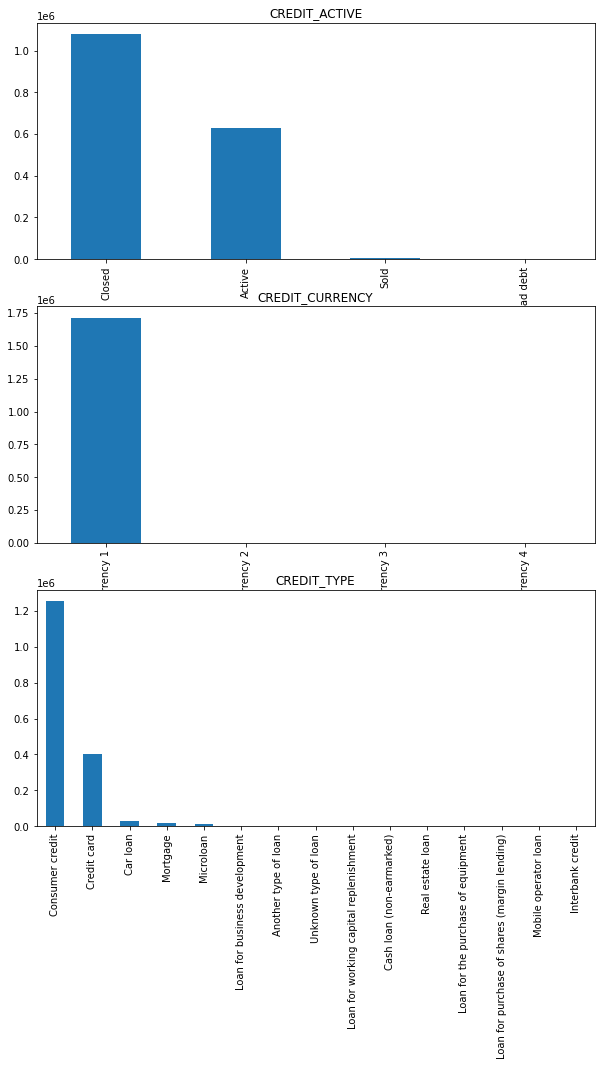

In [8]:
columns_obj = bureau_df.select_dtypes('object').columns
def plot_bar(cols):
    bureau_df[cols].value_counts().plot(kind='bar')

plt.figure(figsize = (10,20))    
for i in range(1, 4, 1):
    plt.subplot(4, 1, i)
    plot_bar(columns_obj[i-1])
    plt.title(columns_obj[i-1])

### Comment: 
+ The majority of credits are either closed or active. 
+ One currency dominates all credits. Maybe its USD. 
+ The majority of loans are consumer credits or credit card. Then car loans and mortgage loans come after.

### Bureau_df: Plot numeric features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


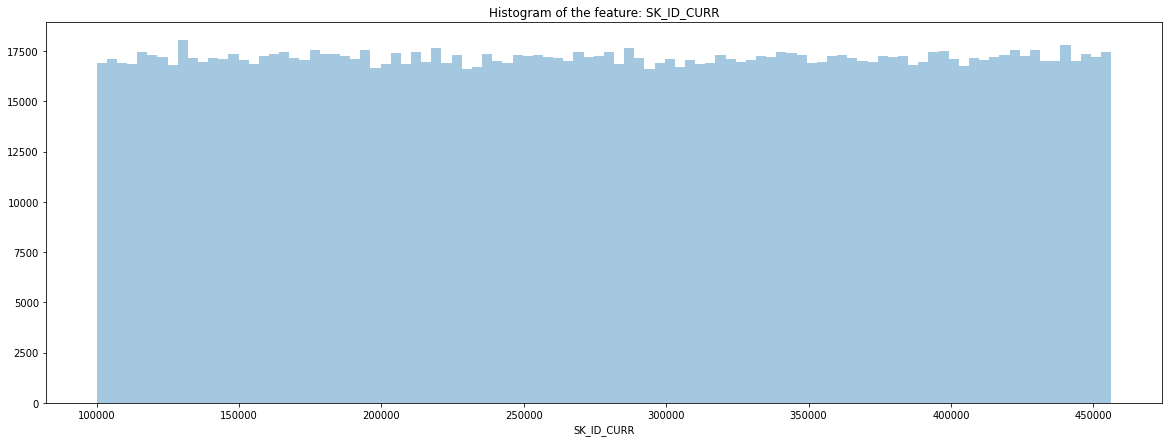

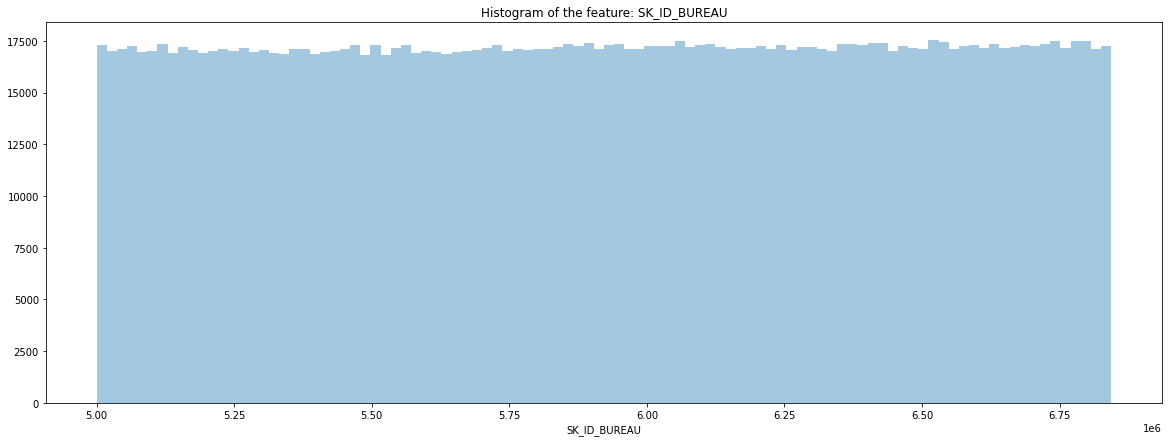

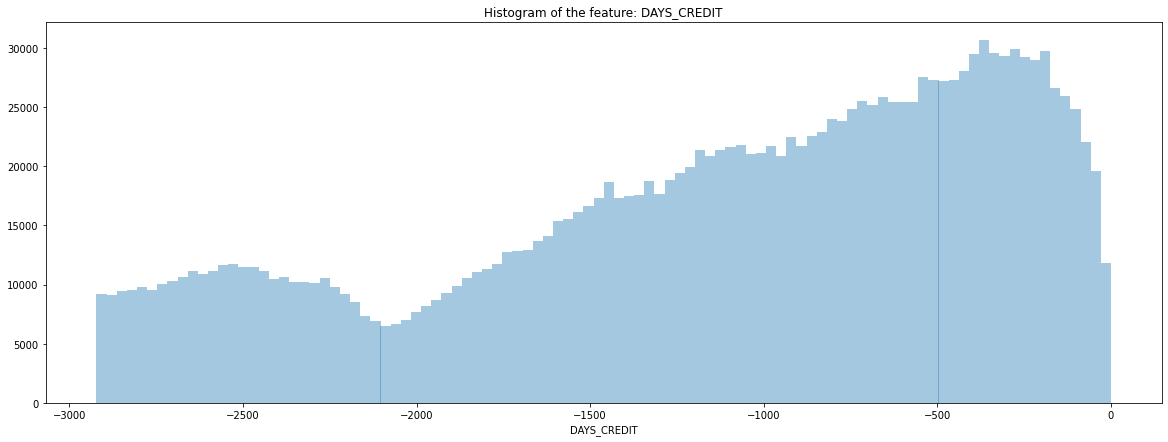

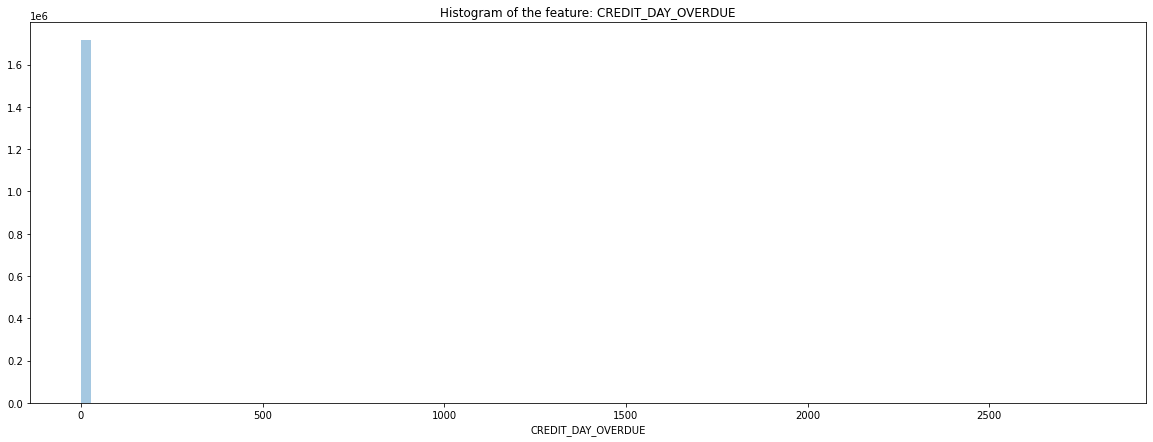

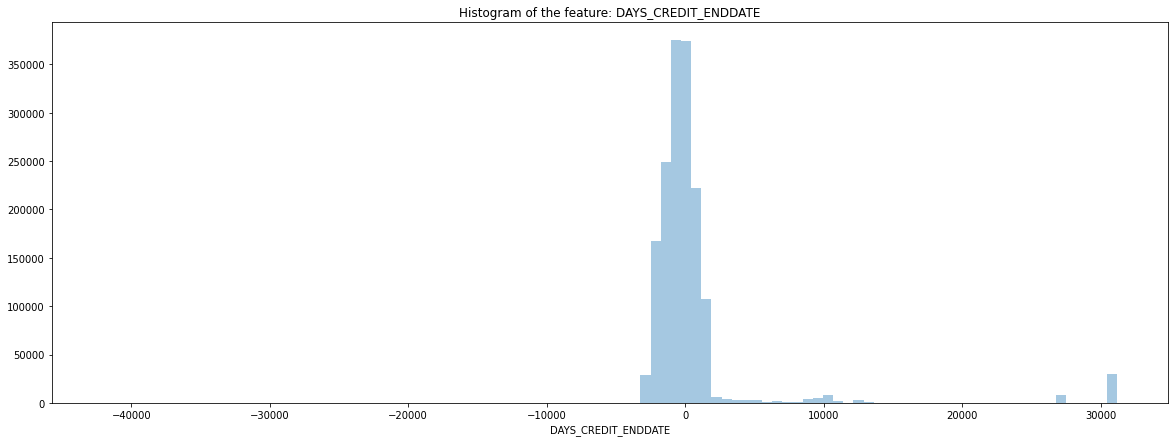

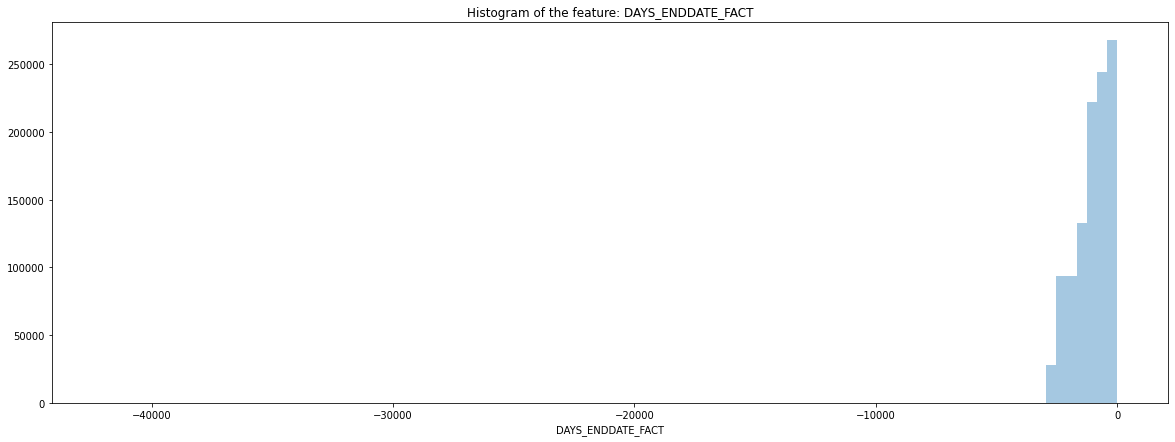

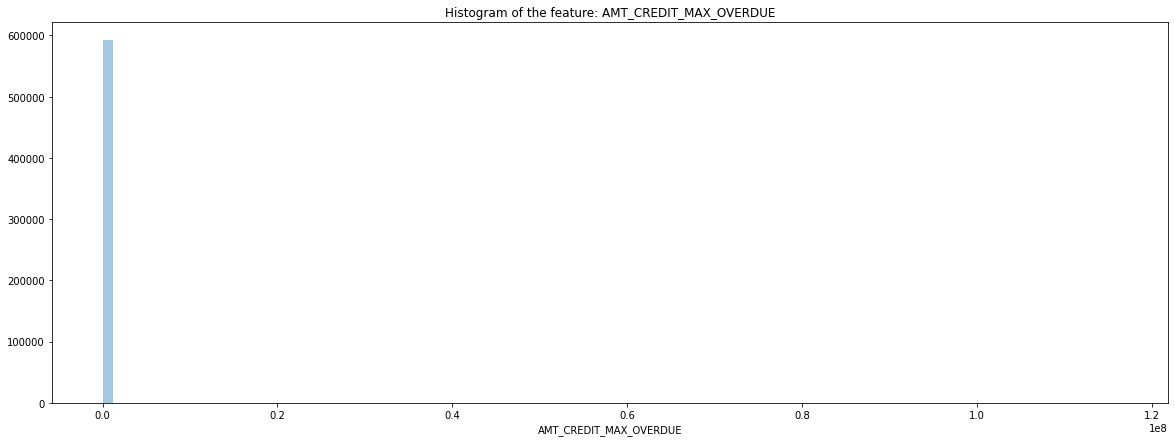

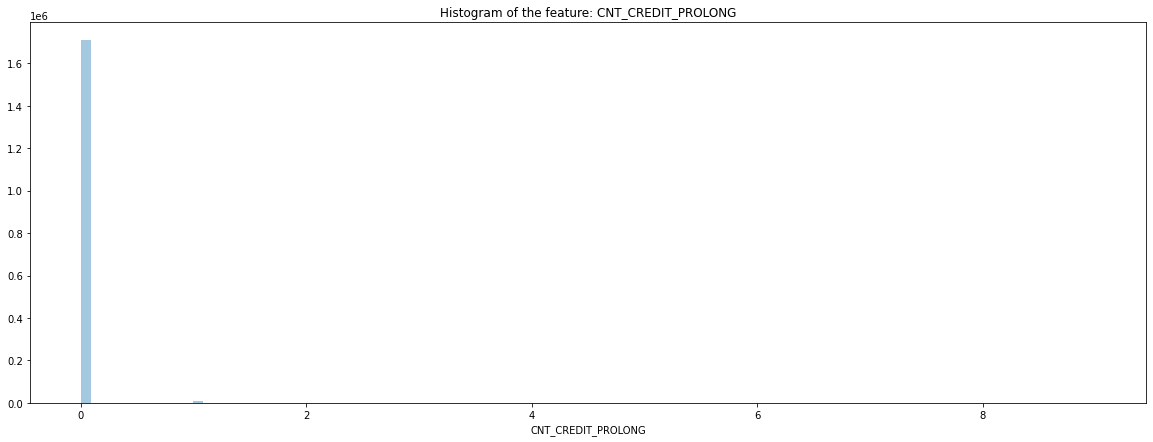

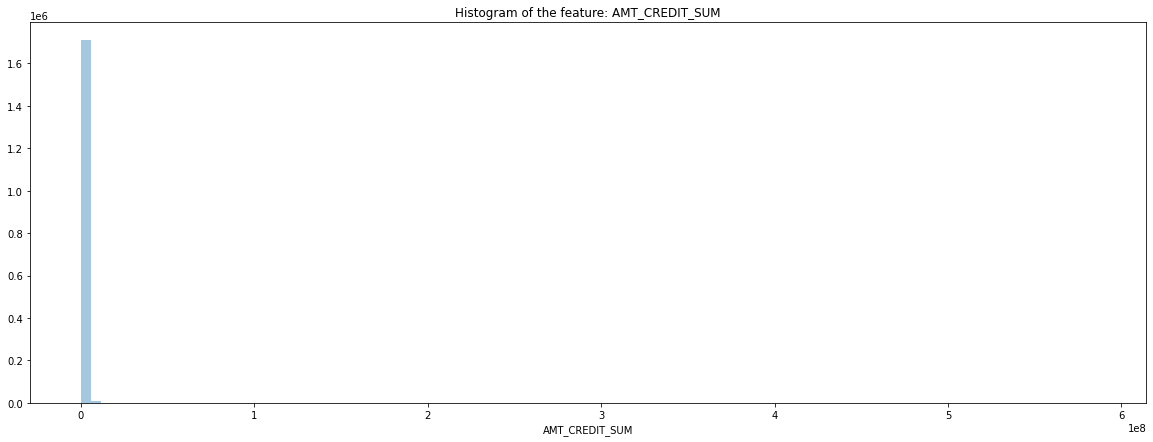

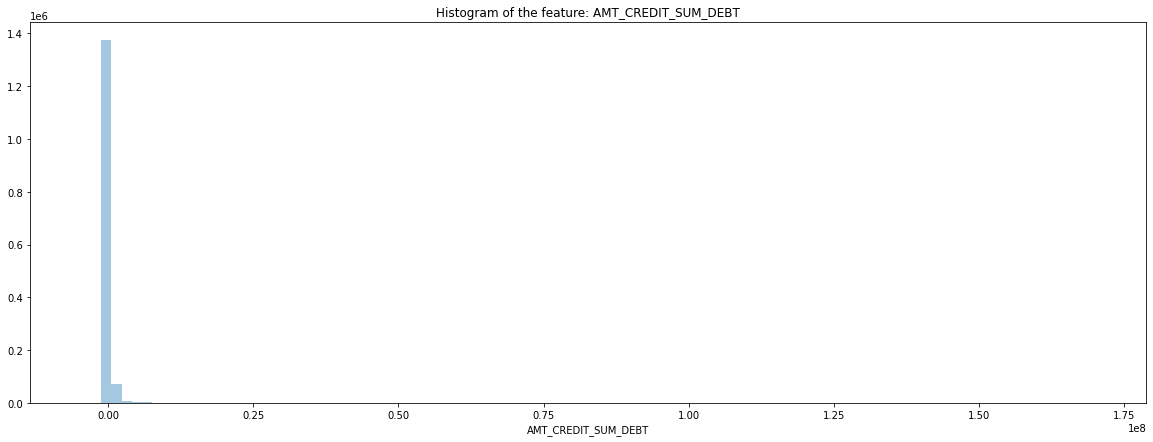

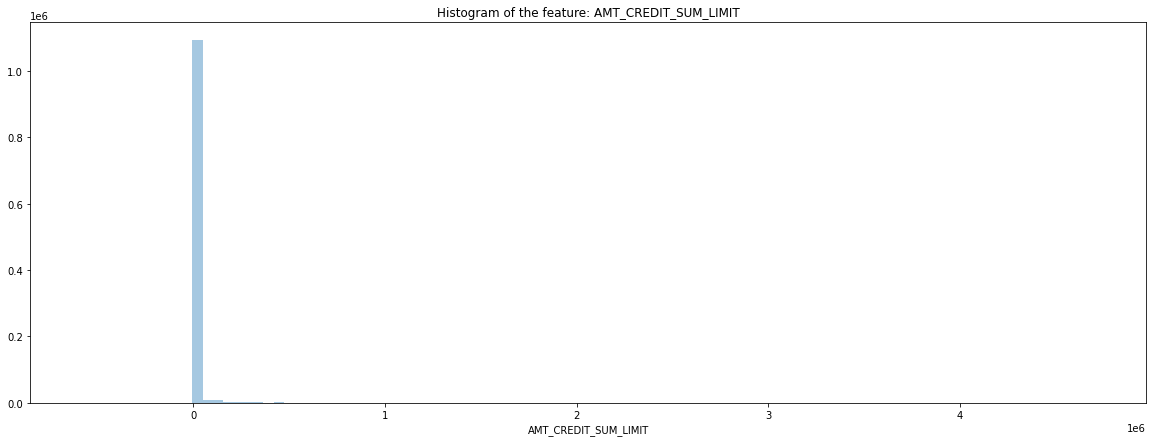

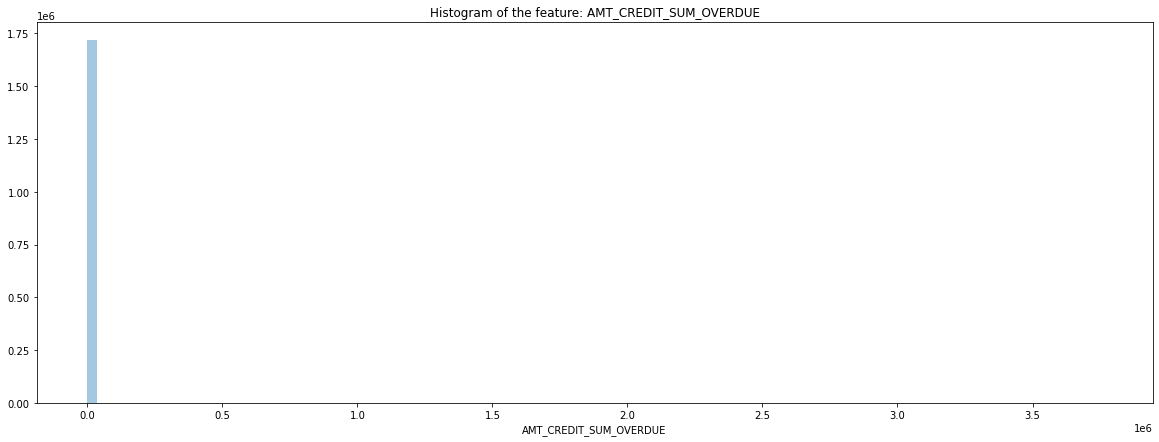

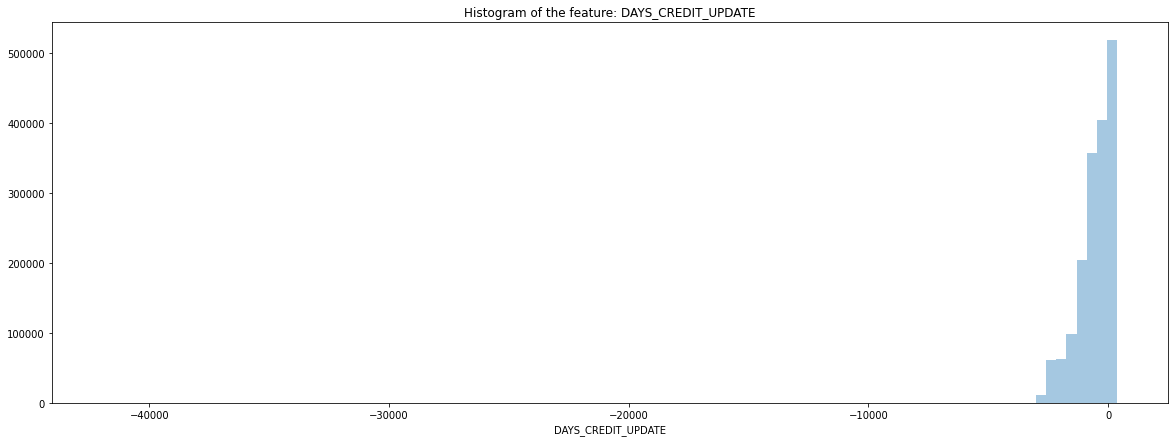

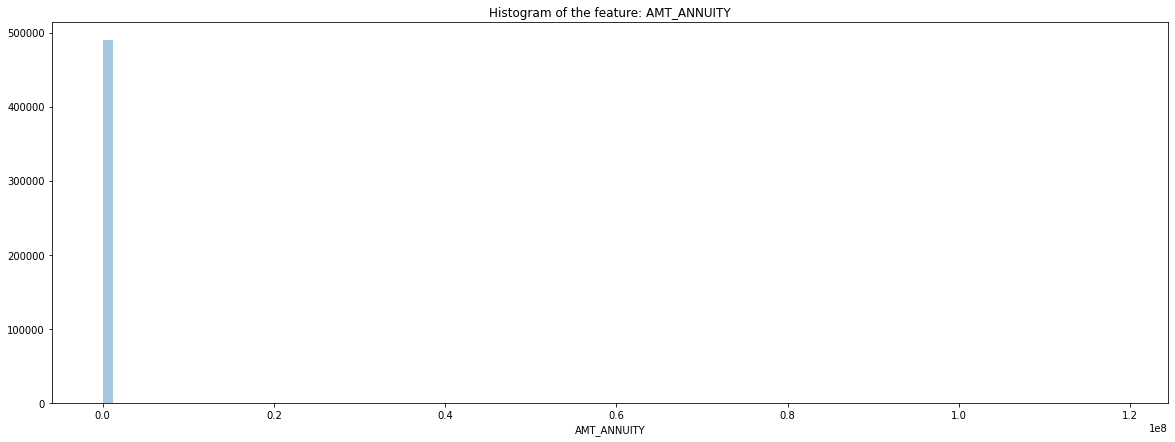

In [9]:
numeric_col = bureau_df.select_dtypes(exclude='object').columns
for feature in numeric_col:
    fig, ax = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (20, 7))
    
    # Plot feature distribution
    sns.distplot(bureau_df[feature].dropna(), kde = False, bins = 100, ax = ax)
    ax.set_title("Histogram of the feature: " + feature)

### Comment: 
They are a lot of outliers, especially for features: CREDIT_DAY_OVERDUE, AMT_CREDIT_SUM_DEBT, AMT_ANNUITY, AMT_CREDIT_SUM, DAYS_CREDIT_ENDDATE, AMT_CREDIT_SUM_LIMIT, CNT_CREDIT_PROLONG, DAYS_ENDDATE_FACT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_MAX_OVERDUE, DAYS_CREDIT_UPDATE


## BUREAU BALANCE

### Understanding of variables

In [10]:
bureau_balance_df.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample # of relative previous credits # of months where we have some history observable for the previous credits) rows.
- Monthly balances of previous credits in Credit Bureau.
- STATUS: "Status of Credit Bureau loan during the month (active, closed, DPD0-30,…

In [11]:
bureau_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [12]:
check_missing(bureau_balance_df) #-> do not have missing value

,Number missing Value,Percent


### Bureau_balance: Plot object features

<AxesSubplot:>

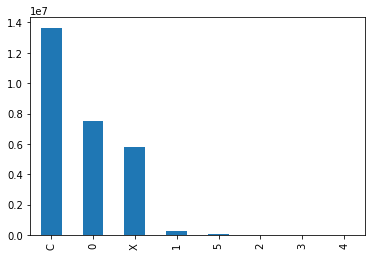

In [13]:
bureau_balance_df['STATUS'].value_counts().plot(kind='bar')

### Comment
status c, o,x has high count 

### Bureau_balance: Plot numeric features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='Density'>

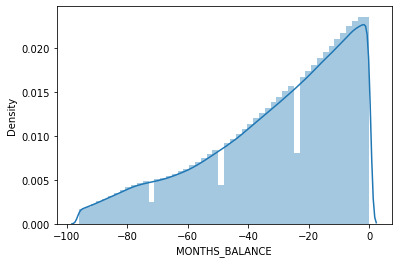

In [14]:
 sns.distplot(bureau_balance_df['MONTHS_BALANCE'].dropna())

In [15]:
bb_unique_df = bureau_balance_df.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE':'mean'})
bureau_merge = pd.merge(bureau_df, bb_unique_df, how='left', on='SK_ID_BUREAU')

Text(0.5, 1.0, 'Correlation plot between numerical features')

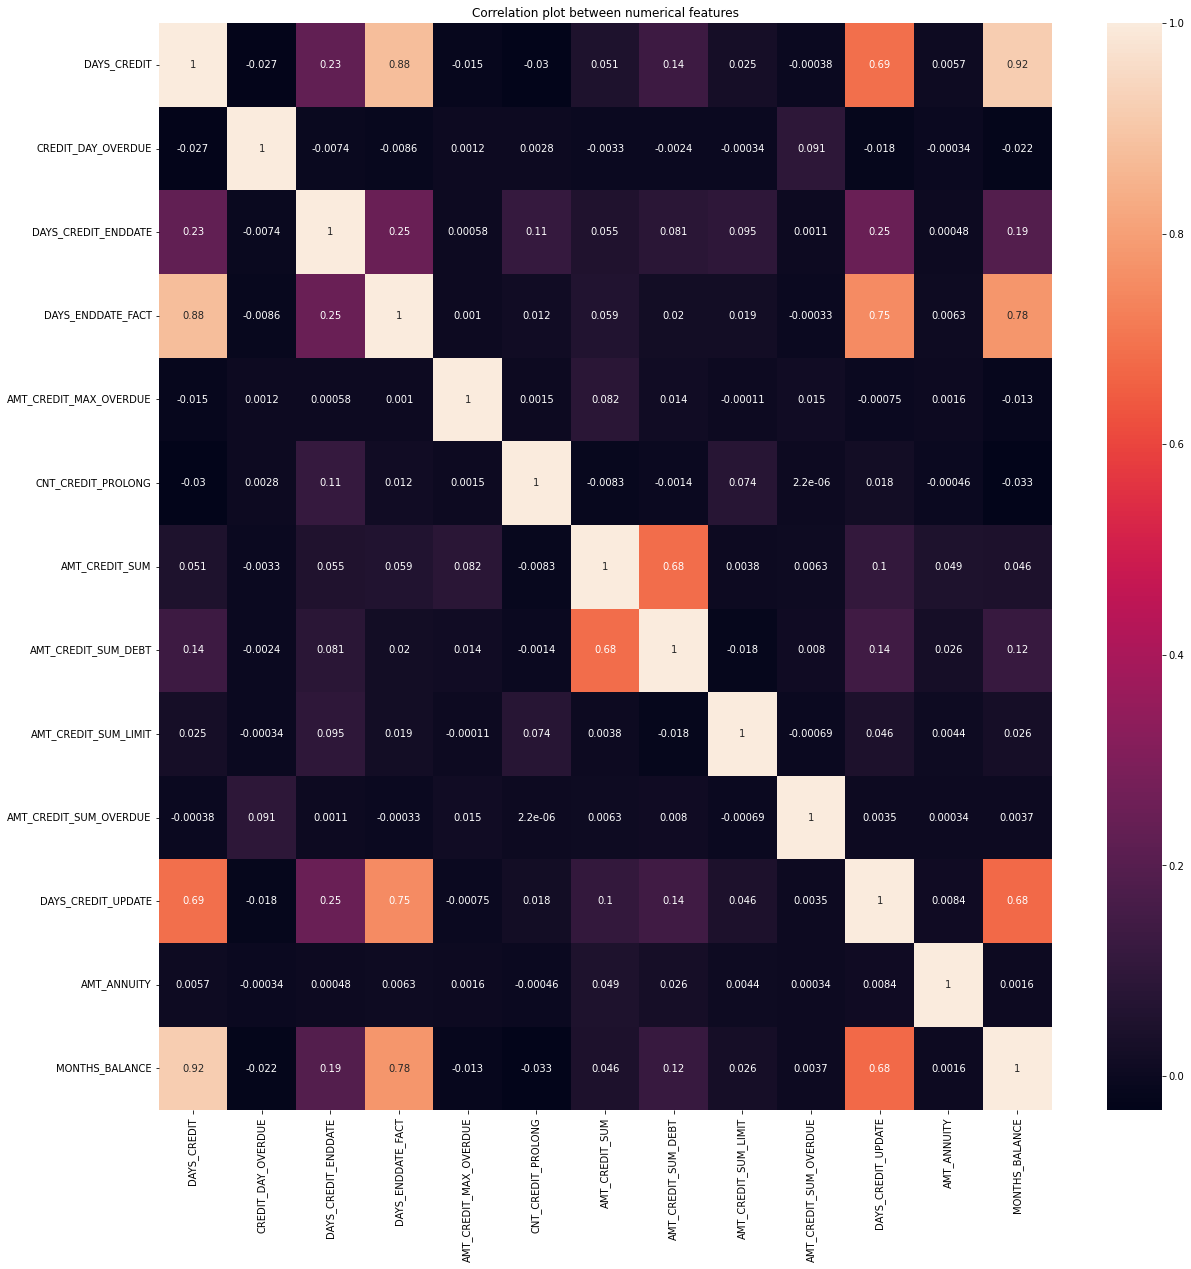

In [16]:
num_features_df = bureau_merge.select_dtypes(exclude='object')
corr = num_features_df.drop(['SK_ID_BUREAU', 'SK_ID_CURR'], axis=1).corr()
plt.figure(figsize = (20, 20))
corr_plot = sns.heatmap(corr, annot = True)
plt.title("Correlation plot between numerical features")

 ### Comment
 High correlation exists between DAYS_CREDIT and DAYS_ENDDATE_FACT.